In [ ]:
# House_Price_Prediction_Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [5]:
dataset.shape

(2919, 13)

In [8]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


<Axes: >

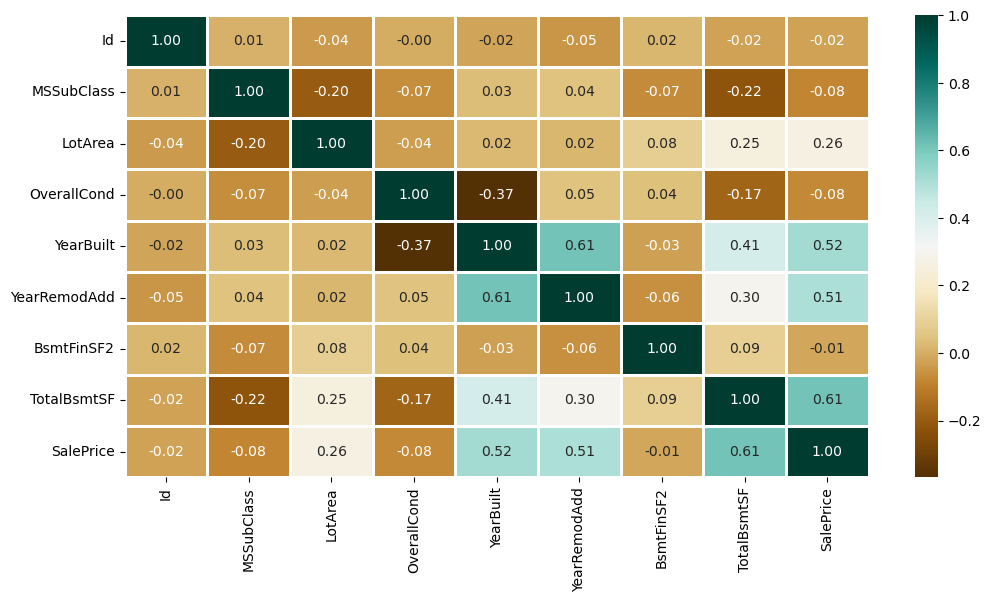

In [6]:
# correlation map 
# Dark green (≈ +1) → strong positive correlation (they increase together).

# Dark brown (≈ -1) → strong negative correlation (one increases, the other decreases).

# Light colors near 0 → weak or no correlation.

numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

C:\Users\raymo\AppData\Local\Temp\ipykernel_33880\3569383919.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=object_cols, y=unique_values, palette=colors)


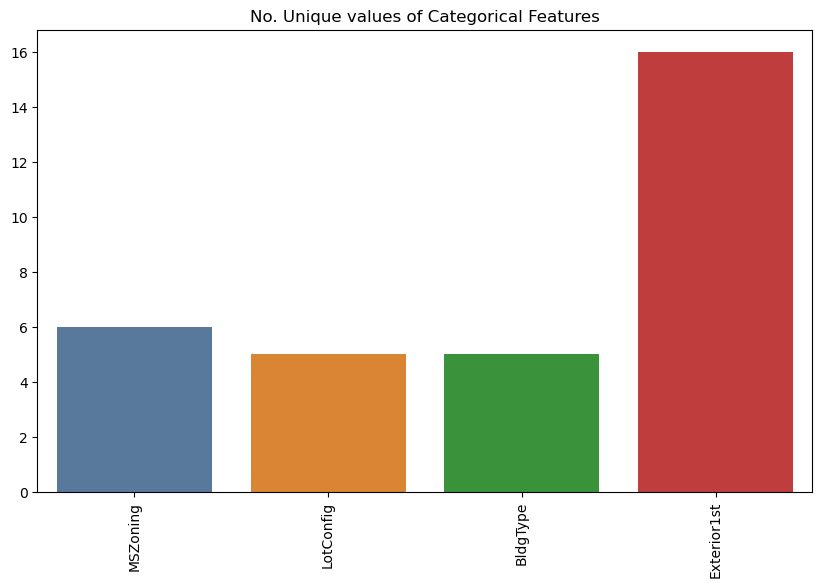

In [ ]:
# count of each catagory feature
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

colors = ['#4C78A8', '#F58518', '#2CA02C', '#D62728']  # one per bar
ax = sns.barplot(x=object_cols, y=unique_values, palette=colors)
plt.show()


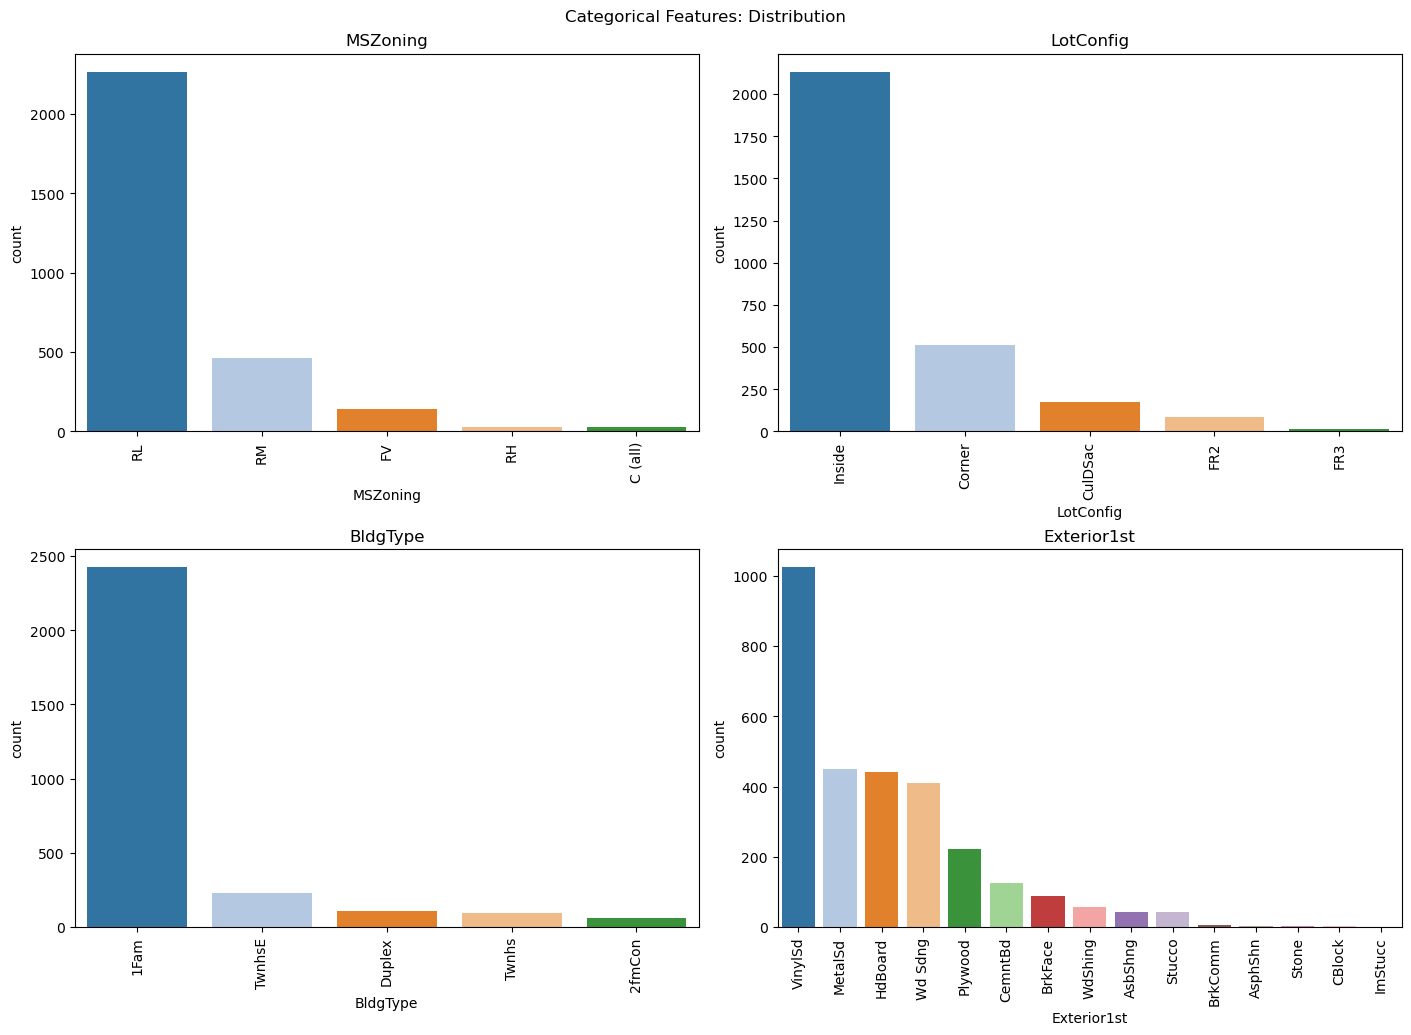

In [25]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

cats = object_cols                       # your list of categorical columns
n = len(cats)
ncols = 2                                # or 3; choose what fits
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(
    nrows, ncols, figsize=(7*ncols, 5*nrows), constrained_layout=True
)
axes = axes.ravel()                      # flatten to 1D

for ax, col in zip(axes, cats):
    # counts (include NaN if you want: dropna=False)
    y = dataset[col].value_counts()

    # seaborn >=0.14 friendly: use hue to color each category
    tmp = y.reset_index()
    tmp.columns = [col, 'count']
    sns.barplot(
        data=tmp, x=col, y='count',
        hue=col, dodge=False, legend=False,
        palette=sns.color_palette('tab20', n_colors=len(tmp)),
        ax=ax
    )
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=90)

# hide any unused axes (when grid > number of plots)
for ax in axes[len(cats):]:
    ax.set_visible(False)

fig.suptitle('Categorical Features: Distribution', y=1.02)
plt.show()


Catagory Feature Explained

MSZoning (municipal zoning class)

RL – Residential Low density

RM – Residential Medium density

RH – Residential High density

FV – Floating Village Residential

C (all) – Commercial (all commercial zones)

LotConfig (lot configuration relative to streets)

Inside – Interior lot (not on a corner)

Corner – Corner lot

CulDSac – Cul-de-sac

FR2 – Frontage on 2 sides of property

FR3 – Frontage on 3 sides of property

BldgType (dwelling type)

1Fam – Single-family detached

TwnhsE – Townhouse end unit

Twnhs – Townhouse inside unit

Duplex – Duplex

2fmCon – Two-family conversion (originally single-family converted to two-family)

Exterior1st (primary exterior covering)

VinylSd – Vinyl siding

MetalSd – Metal siding

HdBoard – Hardboard siding

Wd Sdng – Wood siding

Plywood – Plywood siding

CemntBd – Cement board (e.g., fiber-cement/Hardie)

BrkFace – Brick face/veneer

WdShng – Wood shingle

AsbShng – Asbestos shingle

Stucco – Stucco

BrkComm – Common brick

AsphShn – Asphalt shingle siding

Stone – Natural stone

CBlock – Concrete block

ImStucc – Imitation stucco

In [27]:
# Data Cleaning

dataset.drop(['Id'],
             axis=1,
             inplace=True)

dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())

new_dataset = dataset.dropna()

In [ ]:
# convert object value into int value using onehotencoder
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [30]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
# SVM - Support vector Machine
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


In [37]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.19316959410009366